<a href="https://colab.research.google.com/github/ashwanirajan/LogisticMap-MandelbrotSet/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's start with a simple question of Rabbit population. If we have x rabbits this year, we need to model the number of rabbits next year and so on. The simplest model could be $x_{n+1} = r.x_n$ , where r could be a positive or negative number. If $r = 2$, the population would increase exponentially as seen below 


In [1]:
!cd drive/MyDrive/LogisticMap/

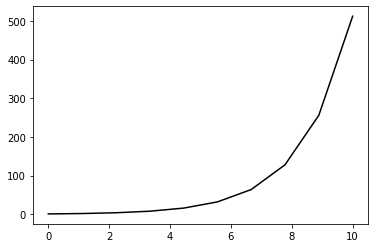

In [2]:


import numpy as np
import matplotlib.pyplot as plt


def exp(r,x):
  return r*x

iterations = 10
t = np.linspace(0, iterations,iterations)
x = np.ones((iterations,1))
x[0] = 1
#print(x.shape)
for i in range(1,iterations):
  x[i] = exp(2,x[i-1])
#print(x)
fig, ax = plt.subplots(1, 1)
ax.plot(t, x ,'k')

Here, it means that the population would grow exponentially forever. But that's not the case seen in nature. Hence, to add the constraints on the environment, we can add a $(1-x)$ factor, where x is a percentage of the theoretical maximum. i.e $x \epsilon [0,1]$.

This equation is the **logistic map**.

$x_{n+1} = r*x_n*(1-x_n)$







In [3]:
def logistic(r, x):
    return r * x * (1 - x)

When you graph the population next year vs the population this year, you see an inverted parabola

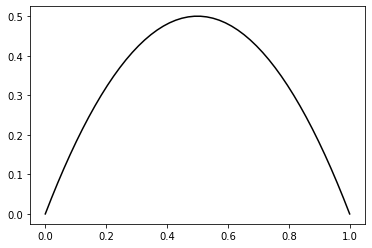

In [4]:
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(2, x), 'k')

Let's assume that we are dealing with an active population of rabbits. Taking $r = 2.5$, and let's take the starting population to be $x = 0.4$ i.e. 40% of the theoretical maximum. You can see that the population stabilizes after sometime, and this stable population values are independent of the initial value. You can check this by moving the slider for population initial value and checking how the plot changes. 

However, something really interesting happens when we change **$r$**. Keeping $r < 1$, we see that the populaton eventually drops to zero. Keeping $r$ between 1 and 3, we see that the population stabilizes to one value which keeps increasing as $r$ increases. Once $r$ crosses three, we see that the population oscillates between 2 values, i.e the population keeps increasing and decreasing every consecutive year. 

Once $r$ crosses 3.5, the population now oscillates between 4 different values. As we further increase $r$, the number of oscillation cycle values keep doubling. These are called **period doubling bifurcations**. And then at $r = 3.57$ - **Chaos!** The population doesn't settle at all and keeps bouncing around as random. Now, as further increases, there are some windows of order where we see stable population cycles, e.g. $r = 3.83$, there is a stable cycle of 3 values. Infact, between these chaos, we can find oscillation cycle of all periods.
 

In [5]:
import matplotlib.animation as animation
from matplotlib.widgets import Slider
from ipywidgets import widgets,Layout

iterations = 100
t = np.linspace(0, iterations,iterations)
x = np.ones((iterations,1))

slider1 = widgets.FloatSlider(
    value=.75,
    min=0,
    max=1.0,
    step=0.01,
    description='Population initial value:',
    disabled=False,
    layout=Layout(width='50%', height='80px'),
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

slider2 = widgets.FloatSlider(
    value=.75,
    min=0.00,
    max=4.00,
    step=0.001,
    description='r:',
    layout=Layout(width='50%', height='80px'),
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.01f',
)


display(slider1)
display(slider2)

FloatSlider(value=0.75, description='Population initial value:', layout=Layout(height='80px', width='50%'), ma…

FloatSlider(value=0.75, description='r:', layout=Layout(height='80px', width='50%'), max=4.0, readout_format='…

Text(0.5, 1.0, 'population over time')

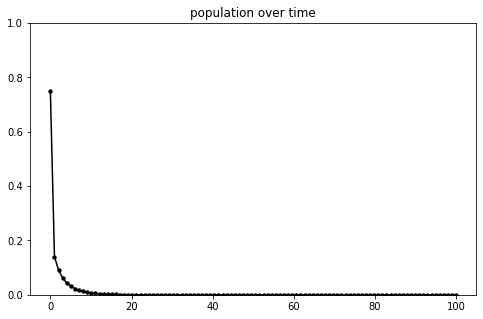

In [6]:
x[0] = slider1.value
r = slider2.value
#print(x.shape)
for i in range(1,iterations):
  x[i] = logistic(r,x[i-1])
#print(x)
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.scatter(t, x, c = 'black', marker = '.' )
ax.plot(t, x, c = 'black', marker = '.' )
ax.set_ylim(0, 1)
ax.set_title("population over time")

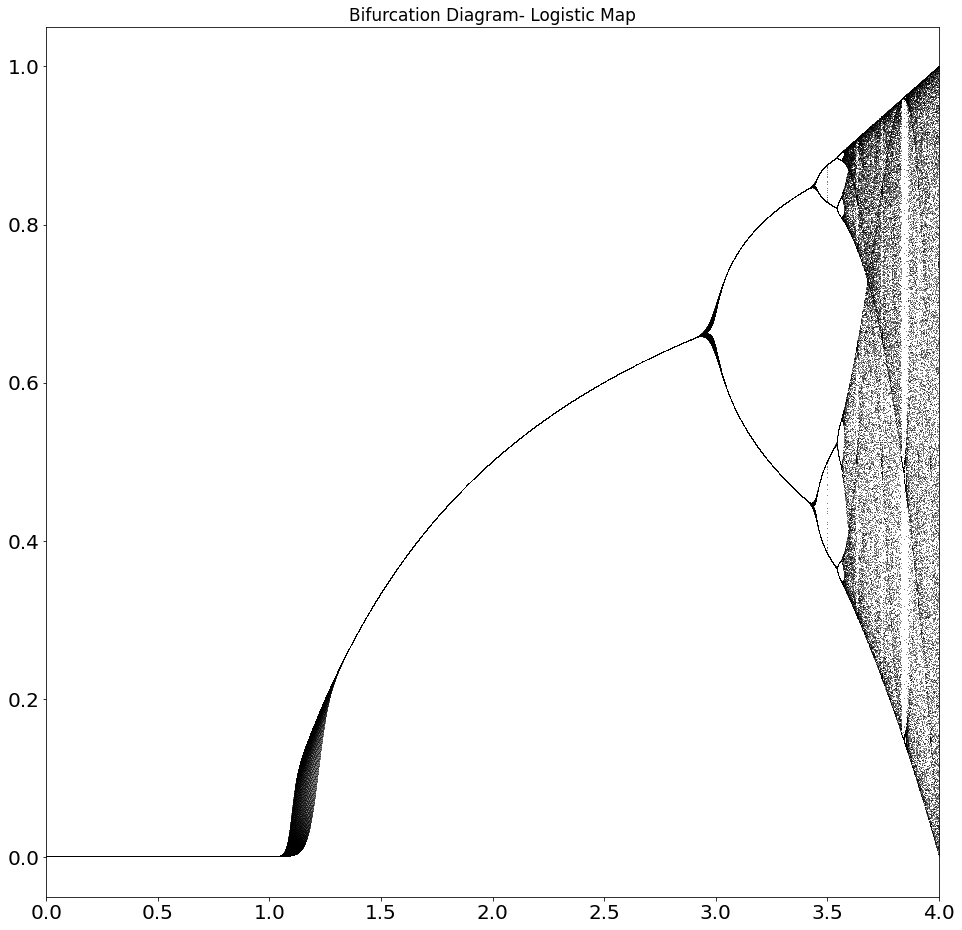

In [9]:
n = 10000
r = np.linspace(0, 4.0, n)
x = 1e-5 * np.ones(n)


last = 50

fig, ax1 = plt.subplots(1, 1, figsize=(16, 16),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=0.5)
ax1.set_xlim(0, 4.0)
ax1.set_title("Bifurcation Diagram- Logistic Map", Fontsize = 17)
ax1.tick_params(axis='both', which='major', labelsize=20)

## Mandelbrot Set


The Mandelbrot set is the set obtained from the recurrence relation, $Z_{(n)} = Z^2_{(n-1)} + c$, where, $Z_{(0)} = c$. where c is a complex number. We start with $Z^2_{(n-1)} = 0$ and if this iteration converges for a complex number $c$, then $c$ is the part of the Mandelbrot Set. The below function gives us all the values for any complex number $c$ till N iterations.

In [8]:
def get_iter(c:complex, thresh:int =40, max_steps:int =25, lim:int = 15) -> int:
    # Z_(n) = (Z_(n-1))^2 + c
    # Z_(0) = c
    z=c
    i=1
    values = np.zeros(max_steps-1)
    #print((z*z.conjugate()).real)
    while i<max_steps and (z*z.conjugate()).real<thresh:
        z=z*z +c
        #print((z*z.conjugate()).real)
        values[i-1] = (z*z.conjugate()).real
        
        i+=1
    
    
    # if i != max_steps:
    #   values = np.zeros((max_steps-1,))
      
    # else:
    #   values = np.array(values)
      

    return i, values

In [9]:
# a, b = get_iter(complex(-1.99,0.1), 4, 500)
# b.shape
# plt.hist(b, bins = 20)

(499,)

I have created a Plotter function, which will run the above get_iter() function on a given range in $x$ and $y$ directions. Since the Mandelbrot set extends between $-2 < x < 0.47$ and $-1.12 < y < 1.12$, these are taken to be the bounds.  

In [11]:
def plotter(del_step, thresh, max_steps):
    
    
    x_range = np.arange(-2, 0.4,del_step)
    y_range = np.arange(-1.13,1.13,del_step)
    jk = np.zeros((len(x_range),len(y_range),max_steps-1))
    img=np.full((len(y_range),len(x_range)), 255)

    for x in range(len(x_range)):
        for y in range(len(y_range)):
            it, a = get_iter(complex(x_range[x],y_range[y]), thresh=thresh, max_steps=max_steps)
            
            jk[x,y,:] = a
            #print(x_range[x], y_range[y], jk[x,y,:])
            img[y][x] = 255 - it
    return img, jk

In [12]:
x_range = np.arange(-2, 0.4, 0.01)
y_range = np.arange(-1.13,1.13,0.01)
max_steps = 500
thresh = 4
del_s =0.01

Since our $y$ iterator does not pass through $y = 0$, wich apparently contains most of the points in the set (alteast of $x < -1.25$), I have run the plotter function separately for $y = 0$ and saved the results 

In [13]:
#Data for y = 0
y = 0
jk_noY = np.zeros((len(x_range),1,max_steps-1))
for x in range(len(x_range)):
  it, a = get_iter(complex(x_range[x],y), thresh=thresh, max_steps=max_steps)
  jk_noY[x,y,:] = a
  #print(x_range[x], y_range[y], jk[x,y,:])

Now, I am running the plotter function for rest of the complex space, and saving the iteration results for each complex number $c$ in this range.

In [14]:
img, jk = plotter(del_step = del_s , thresh=thresh, max_steps = max_steps)


In [15]:
plot_list = []
last1 = 60
for x in range(len(x_range)):
  for y in range(len(y_range)):
    for i in range(max_steps - last1,max_steps-1):
      plot_list.append([x_range[x], y_range[y], jk[x,y,i]])

y=0
for x in range(len(x_range)):
  for i in range(max_steps - last1,max_steps-1):
    plot_list.append([x_range[x], y, jk_noY[x,y,i]])


In [16]:
plot_array = np.array(plot_list)


In [17]:
plot_array_nonzero = plot_array[plot_array[:,2]!=0]

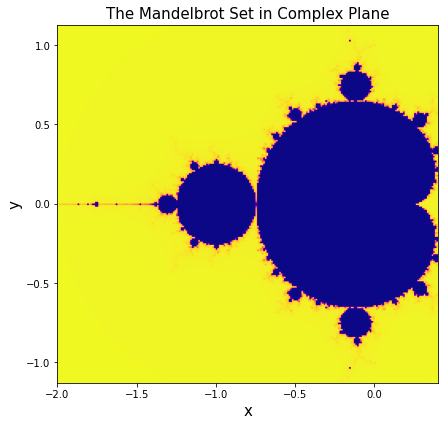

In [23]:
#% matplotlib notebook

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(121)
ax1.imshow(img, extent=[-2,0.4,-1.13,1.13], cmap="plasma")

ax1.set_xlabel('x', fontsize = 15)
ax1.set_ylabel('y', fontsize = 15)
ax1.set_title("The Mandelbrot Set in Complex Plane", fontsize = 15)
#ax1.axis("off")
#ax1.show()

ax2 = fig.add_subplot(122, projection = '3d')
#ax = fig.add_subplot()

ax2.scatter3D(plot_array_nonzero[:,0], plot_array_nonzero[:,1], plot_array_nonzero[:,2], s = 0.1, c = plot_array_nonzero[:,1])
#ax2.plot(plot_array[:,1], plot_array[:,2], ',k', alpha=0.75)
ax2.set_ylim(-1.2, 1.2)
ax2.set_zlim(0, 4)
ax2.set_xlim(-2, 0.39)
ax2.set_xlabel('x', fontsize = 15)
ax2.set_ylabel('y', fontsize = 15)
ax2.set_zlabel('z', fontsize = 15)
#ax2.set_zlabel('z')
ax2.view_init(0, -90)
ax2.set_title("Logistic Map hidden in Madelbrot Set")

plt.savefig('fullPlots.png',bbox_inches='tight')
plt.show()

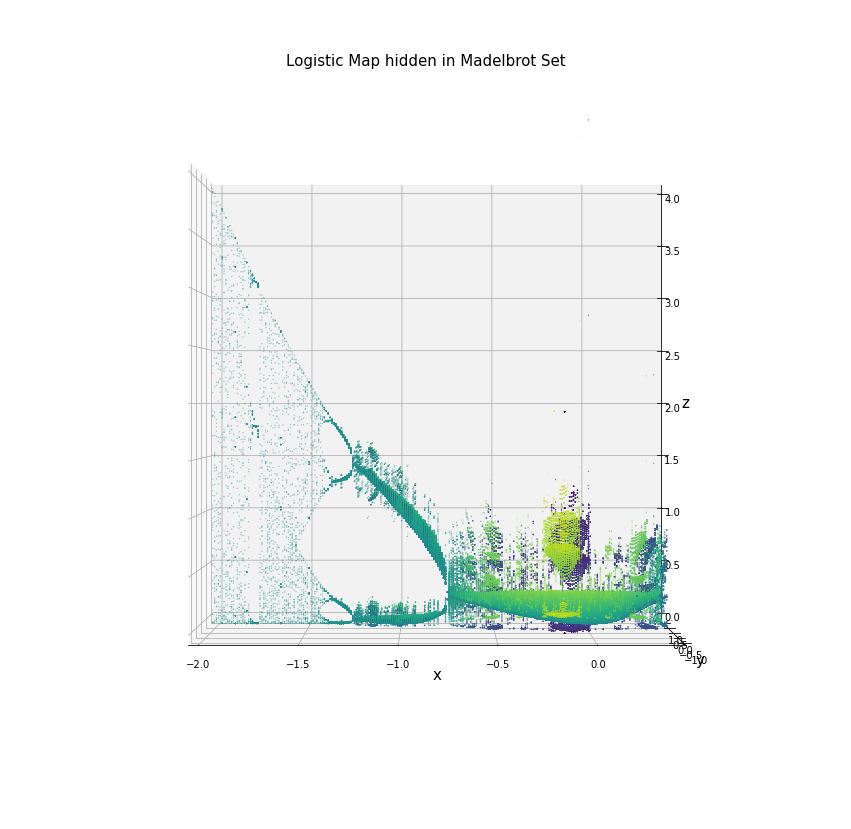

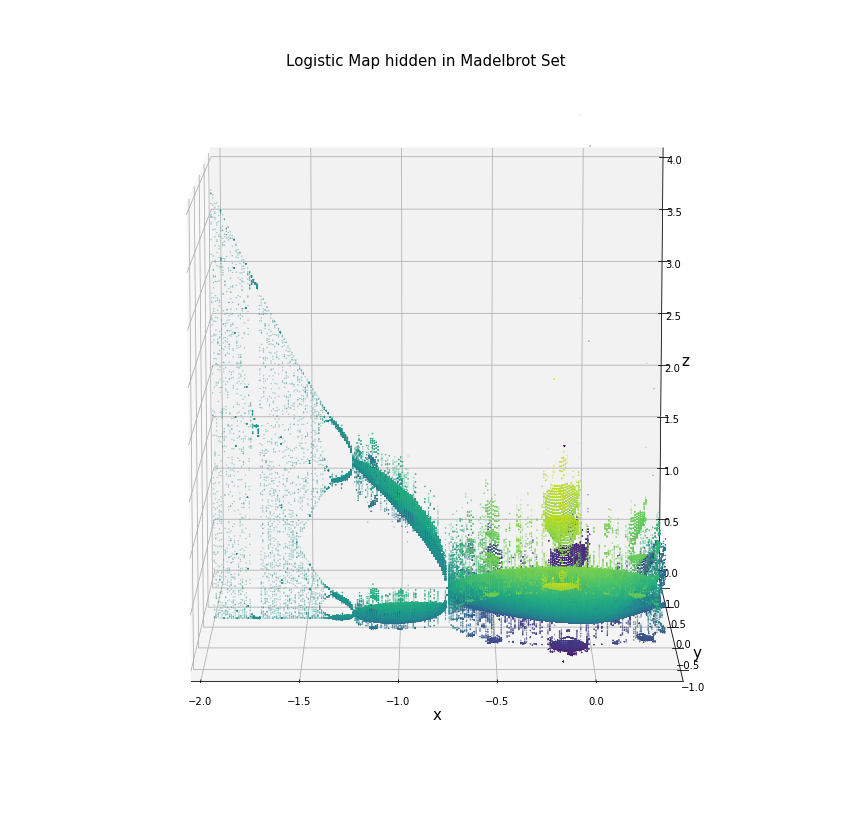

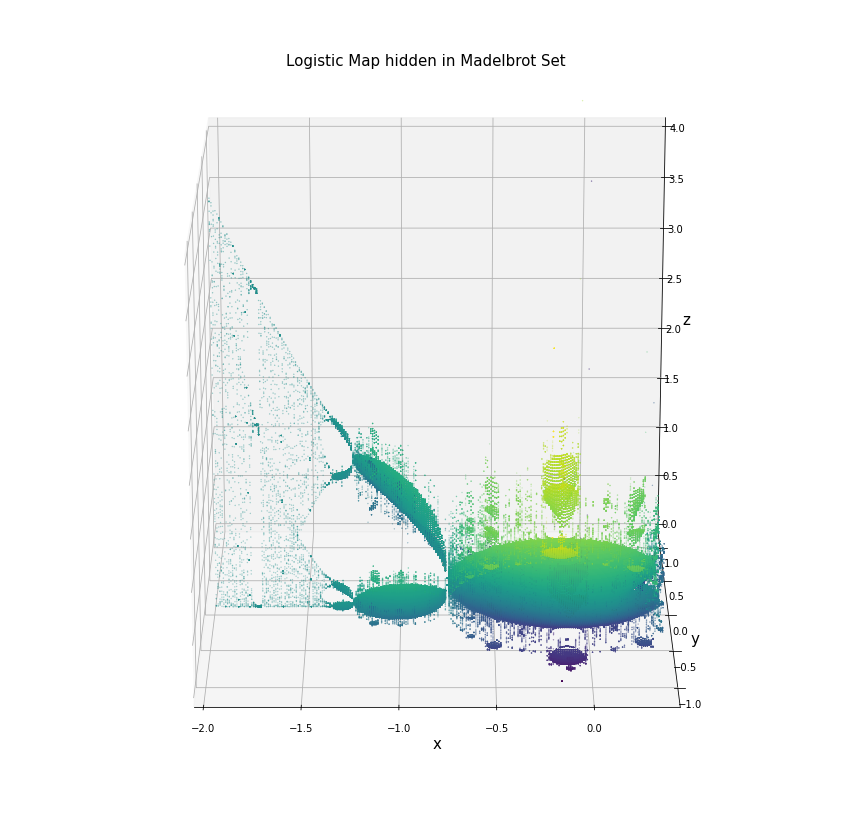

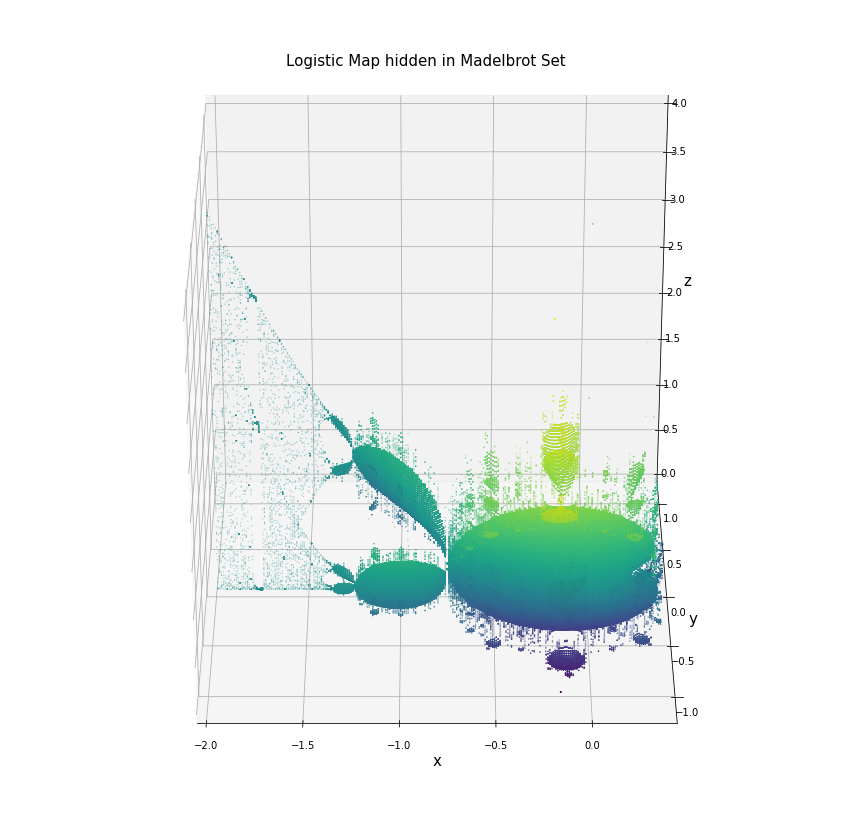

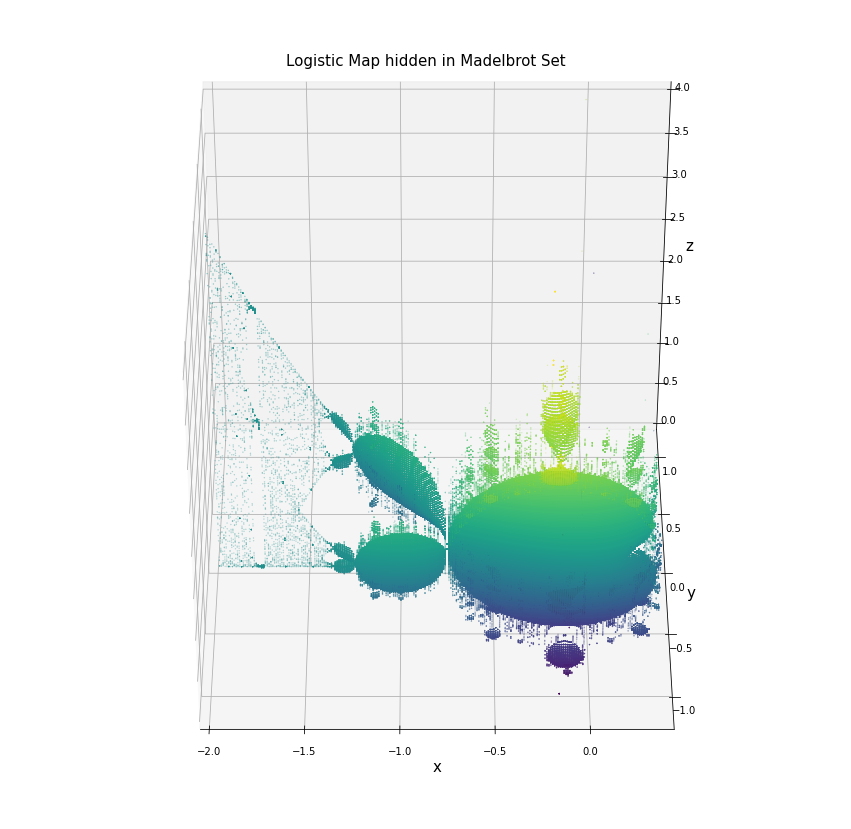

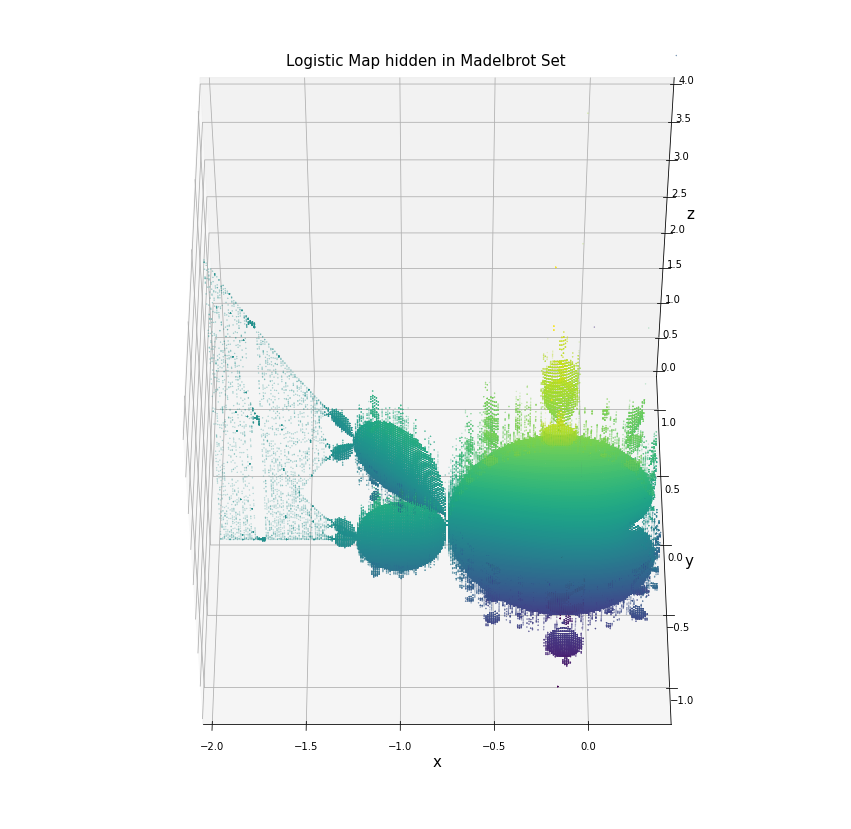

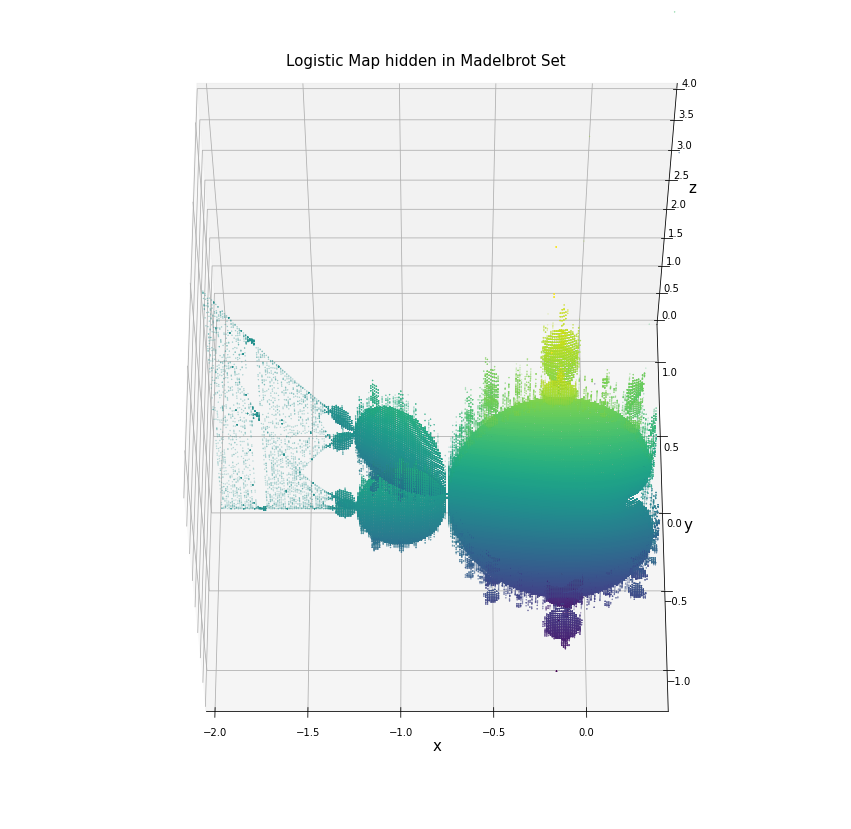

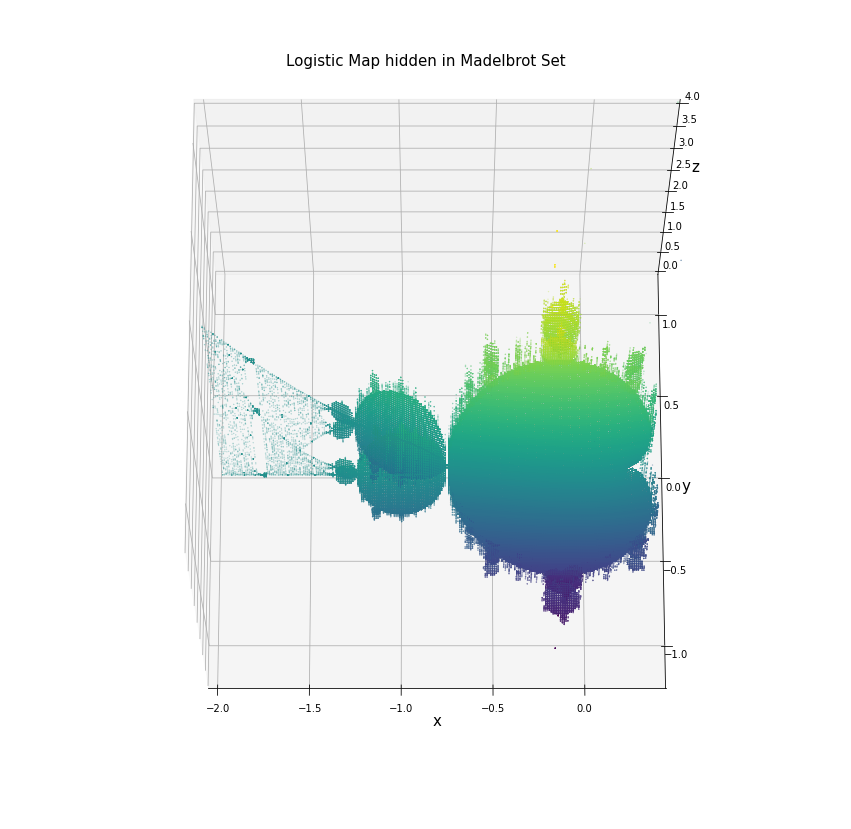

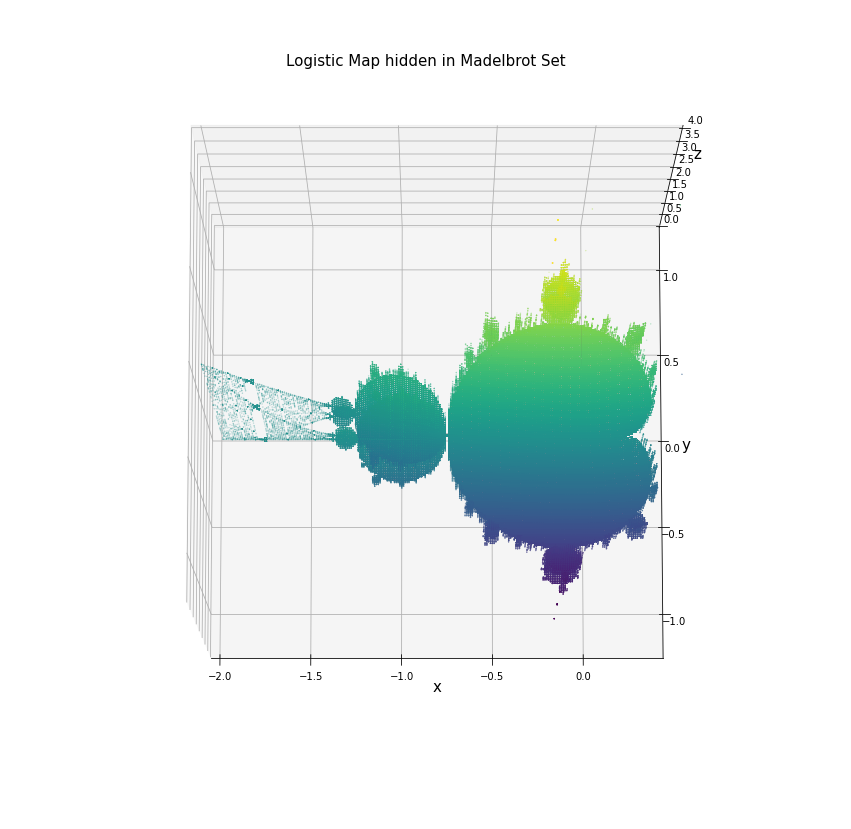

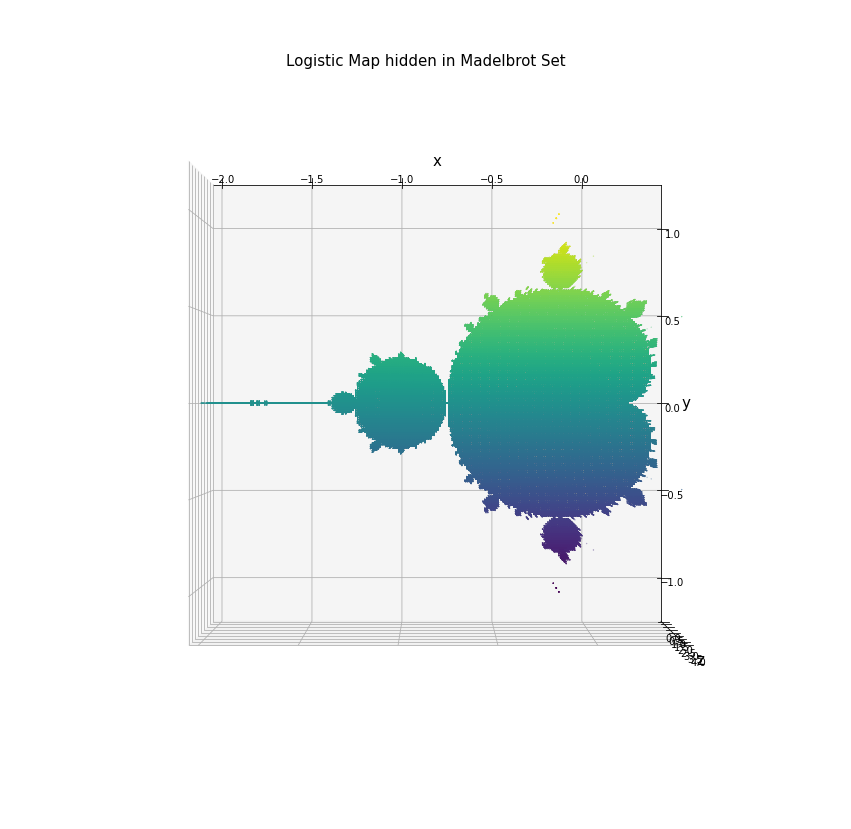

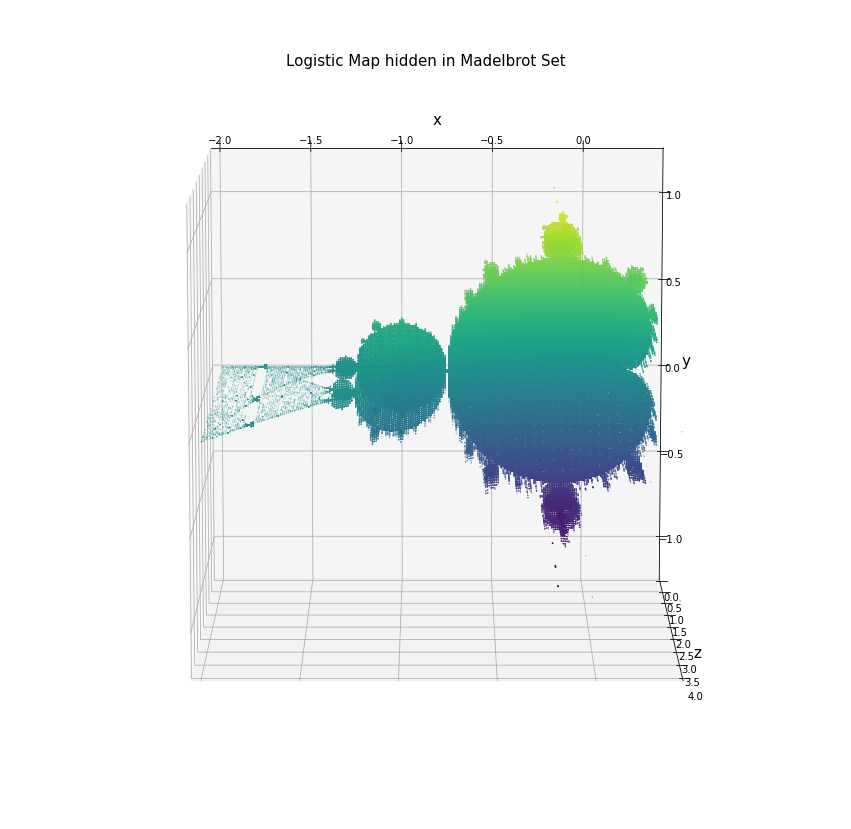

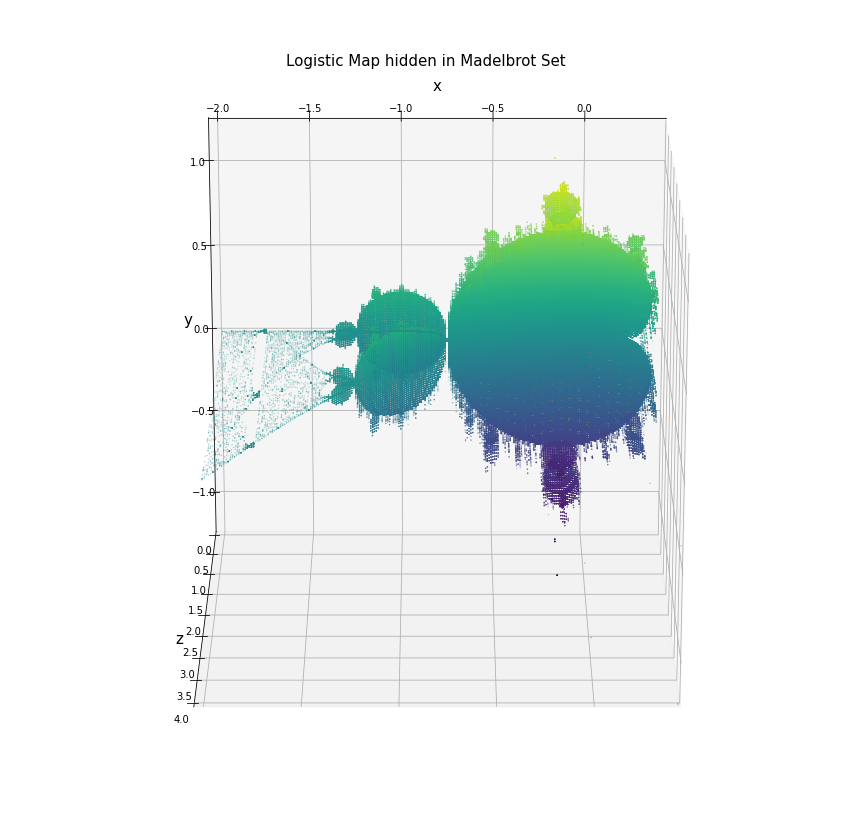

In [25]:
filenames = []
for i in range(0,120,10):
  fig1 = plt.figure(figsize=(15, 15))

  ax3 = fig1.add_subplot(projection = '3d')
  ax3.scatter(plot_array_nonzero[:,0], plot_array_nonzero[:,1], plot_array_nonzero[:,2], s = 0.1, c = plot_array_nonzero[:,1])
  #ax2.plot(plot_array[:,1], plot_array[:,2], ',k', alpha=0.75)
  ax3.set_ylim(-1.2, 1.2)
  ax3.set_zlim(0, 4)
  ax3.set_xlim(-2, 0.39)
  ax3.set_xlabel('x', fontsize = 15)
  ax3.set_ylabel('y', fontsize = 15)
  ax3.set_zlabel('z', fontsize = 15)
  #ax2.set_zlabel('z')
  ax3.view_init(i, -90)
  ax3.set_title("Logistic Map hidden in Madelbrot Set", fontsize = 15)
  plt.savefig('img_%d.png'%(i),bbox_inches='tight')
  filenames.append('img_%d.png'%(i))

  plt.show()

In [22]:
import imageio
print('Creating gif\n')
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

Creating gif



In [ ]:
filenames = []
for i in range(0,100,10):
  fig1 = plt.figure(figsize=(16, 8))

  ax3 = fig1.add_subplot(projection = '3d')
  ax3.scatter(plot_array_nonzero[:,0], plot_array_nonzero[:,1], plot_array_nonzero[:,2], s = 0.1, c = plot_array_nonzero[:,1])
  #ax2.plot(plot_array[:,1], plot_array[:,2], ',k', alpha=0.75)
  ax3.set_ylim(-1.2, 1.2)
  ax3.set_zlim(0, 4)
  ax3.set_xlim(-2, 0.39)
  ax3.set_xlabel('x', fontsize = 15)
  ax3.set_ylabel('y', fontsize = 15)
  ax3.set_zlabel('z', fontsize = 15)
  #ax2.set_zlabel('z')
  ax3.view_init(i, -120)
  
  plt.savefig('img_%d.png'%(i),bbox_inches='tight')
  filenames.append('img_%d.png'%(i))

  plt.show()